<a href="https://colab.research.google.com/github/pascalfriederich/programming_exercises/blob/main/exercise02_rayleigh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [150]:
def rayleigh(x, y, wavelength, n, d, I0):
  R = (x**2.0 + y**2.0)**0.5
  if abs(R)<0.1:
    theta=0.0
    intensity = 0.0
    return(0.0)
  else:
    theta = np.arccos(x/R)
    intensity = I0 * ((1.0 + np.cos(theta)**2.0)/(2.0 * R**2.0)) * (2.0*np.pi/(wavelength**2.0))**4.0 * ((n**2 - 1.0)/(n**2.0 + 2.0))**2.0 * (d / 2.0)**6.0
    return(intensity)

In [151]:
num_pixels = 200
size = 100.0
wavelength = 10.0
n = 2.0
d = 0.02
I0 = 1.0

image = np.zeros((num_pixels, num_pixels))

for i in range(num_pixels):
  for j in range(num_pixels):
    x = size * (-1.0 + 2.0*i/float(num_pixels))
    y = size * (-1.0 + 2.0*j/float(num_pixels))
    image[i][j] = rayleigh(x, y, wavelength, n, d, I0)
  if (i+1)%40==0:
    print("%i of %i rows done"%(i+1, num_pixels))

print(np.min(image), np.max(image))
print(image)

40 of 200 rows done
80 of 200 rows done
120 of 200 rows done
160 of 200 rows done
200 of 200 rows done
0.0 3.896363641360092e-18
[[1.46113637e-22 1.48076478e-22 1.50068829e-22 ... 1.52090968e-22
  1.50068829e-22 1.48076478e-22]
 [1.47087678e-22 1.49080335e-22 1.51103413e-22 ... 1.53157213e-22
  1.51103413e-22 1.49080335e-22]
 [1.48061423e-22 1.50084192e-22 1.52138314e-22 ... 1.54224117e-22
  1.52138314e-22 1.50084192e-22]
 ...
 [1.49034565e-22 1.51087735e-22 1.53173214e-22 ... 1.55291356e-22
  1.53173214e-22 1.51087735e-22]
 [1.48061423e-22 1.50084192e-22 1.52138314e-22 ... 1.54224117e-22
  1.52138314e-22 1.50084192e-22]
 [1.47087678e-22 1.49080335e-22 1.51103413e-22 ... 1.53157213e-22
  1.51103413e-22 1.49080335e-22]]


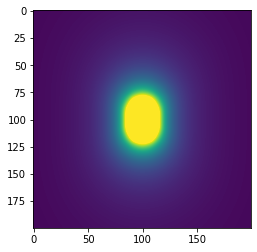

In [154]:
plt.imshow(image, vmin=0.0, vmax = 0.002*np.max(image))